# Welcome to Jupyter

Jupyter is an integrated, literate, and web-based programming environment. In Jupyter, you can author executable *Notebooks* that combine code, output, and documentation. It is dynamic and interpretive, and encourages exploration and experimentation.

A Juputer notebook is divided into *cells*. Each cell can be executed and edited independently. You can also save the contents of cells to produce stand-alone programs if you wish. Jupyter supports many programming languages, such as Python, R, and Julia. In Comp555 we will use primarily Python 2.7.

In [99]:
# In Python, the remainder of lines after a "pound sign" (a.k.a hashtag) is a comment.

N = 16
x = range(-N,N+1,2)    # range(N) -> [0, 1,..., N-1]; range(N,M) -> [N, N+1, ..., M-2, M-1]
                     # range(N,M,S) -> [N, N+S, N+2S, ..., N+kS < M]

print x, len(x)

[-16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16] 17


In [104]:
y = [v*v for v in x]
z = [100-3*v for v in x]
print y
print z

[256, 196, 144, 100, 64, 36, 16, 4, 0, 4, 16, 36, 64, 100, 144, 196, 256]
[148, 142, 136, 130, 124, 118, 112, 106, 100, 94, 88, 82, 76, 70, 64, 58, 52]


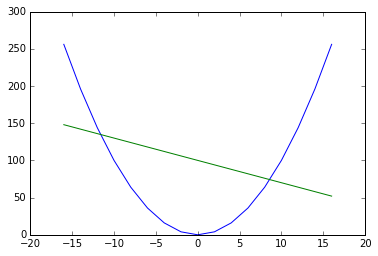

In [105]:
%matplotlib inline
import matplotlib.pyplot as plot

result = plot.plot(x,y)
result = plot.plot(x,z)

# Next well consider some string manipulations

In [96]:
import random

bases = ["ACGT"[random.randint(0,3)] for i in xrange(100)] # xrange() returns an iterator, whereas range() returns a list
dna = ''.join(bases)

print dna

ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC


In [97]:
for i in xrange(10,len(dna),10):
    print dna[:i], dna[i:]

ACCTTCTTAT CGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGT TTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCC GGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGT GGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCC GAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTA AATCAGCCCCTGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCC TGCGGTCTCCATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCC ATACATGCAAACTGGTGTGC
ACCTTCTTATCGAAGGGGGTTTTCGACTCCGGCAGTGTGTGGTTTTCGCCGAGTTCAGTAAATCAGCCCCTGCGGTCTCCATACATGCAA ACTGGTGTGC


In [98]:
def kmers(seq, k):
    return [seq[i:i+k] for i in xrange(len(seq)-k+1)]

def reverseComp(seq):
    return ''.join([{'A':'T','C':'G','G':'C','T':'A'}[c] for c in reversed(seq)])

kmerList = kmers(dna, 8)

palindromes = [kmer for kmer in kmerList if reverseComp(kmer) == kmer]
print palindromes

repeats = [kmer for kmer in kmerList if kmerList.count(kmer) > 1]
print repeats

[]
['GGTTTTCG', 'GGTTTTCG']


In [84]:
from string import maketrans

def reverseCompV2(seq):
    return ''.join(reversed(seq.translate(maketrans("ACGT", "TGCA"))))

assert reverseComp(dna) == reverseCompV2(dna)

%timeit reverseComp(seq)
%timeit reverseCompV2(seq)

10000 loops, best of 3: 35.1 µs per loop
100000 loops, best of 3: 5.77 µs per loop


# For more challenges let's look at [Rosalind](http://rosalind.info)

Let's try [problem 1](http://rosalind.info/problems/dna/).

In [2]:
dna = "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"

print " ".join([str(dna.count(base)) for base in "ACGT"])

20 12 17 21


##  That was easy

Let's try [problem 2](http://rosalind.info/problems/rna/).

In [3]:
dna = "GATGGAACTTGACTACGTAAATT"

print "".join(['U' if (base == 'T') else base for base in dna])

GAUGGAACUUGACUACGUAAAUU


## Also simple

Let's try [problem 3](http://rosalind.info/problems/revc/).

In [15]:
dna = "AAAACCCGGT"

print ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(dna)])

ACCGGGTTTT


## Will they ever require more than one line?

Let's try [problem 4](http://rosalind.info/problems/fib/).

In [16]:
def rabbits(generations, pairsPerLitter):
    sequence = [0,1]
    while (len(sequence) - 1 < generations):
        sequence.append(sequence[-2]*pairsPerLitter + sequence[-1])
    return sequence[-1]

print rabbits(5, 3)

19


# Now try one on your own

Let's try [problem 5](http://rosalind.info/problems/gc/).